In [29]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [5]:
# 이미지 배열을 입력받아 5개 출력하는 함수
def show_images(images, labels):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
    for i in range(5):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

# 원본 이미지를 입력받아 4개의 augmentation 적용하여 시각화
def aug_apply(image, label, aug):
    image_list = [image]
    label_list = ['origin']

    for i in range(4):
        aug_image = aug(image=image)['image']
        image_list.append(aug_image)
        label_list.append(label)

    show_images(image_list, label_list)

In [15]:
b, g, r = cv2.split(image)

# Calculate mean and standard deviation for each channel
mean_b = np.mean(b)
mean_g = np.mean(g)
mean_r = np.mean(r)

std_b = np.std(b)
std_g = np.std(g)
std_r = np.std(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


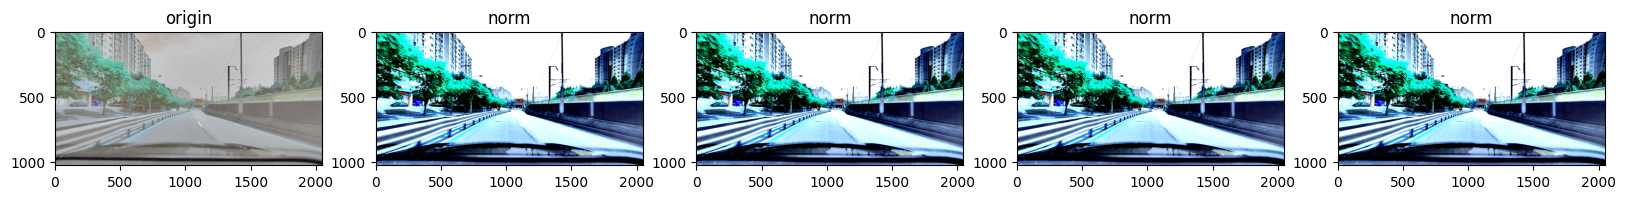

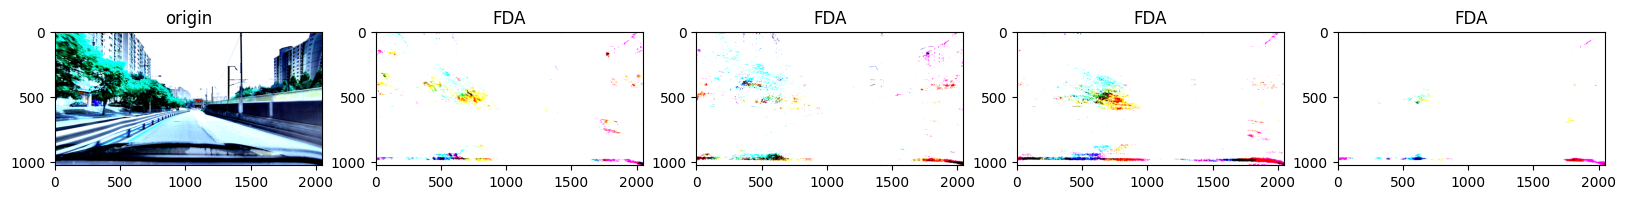

In [21]:
ref_img_path = glob("./data/train_target_image/*")

import albumentations as at

# 좌우 반전
# aug_horizontal = at.HorizontalFlip(p=0.5)
aug_FDA = at.FDA(ref_img_path, beta_limit=10, always_apply=False, p=1)
#aug_norm = at.Normalize(mean=(mean_r,mean_g,mean_b), std=(std_r, std_g, std_b), p=1)
aug_norm = at.Normalize(p=1)


image = cv2.imread('./data/train_source_image/TRAIN_SOURCE_0000.png')

aug_apply(image=image, label='norm', aug=aug_norm)
norm_image = aug_norm(image=image)['image']
# aug_apply(image=image, label='Horizontal', aug=aug_horizontal)
aug_apply(image=norm_image, label='FDA', aug=aug_FDA)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


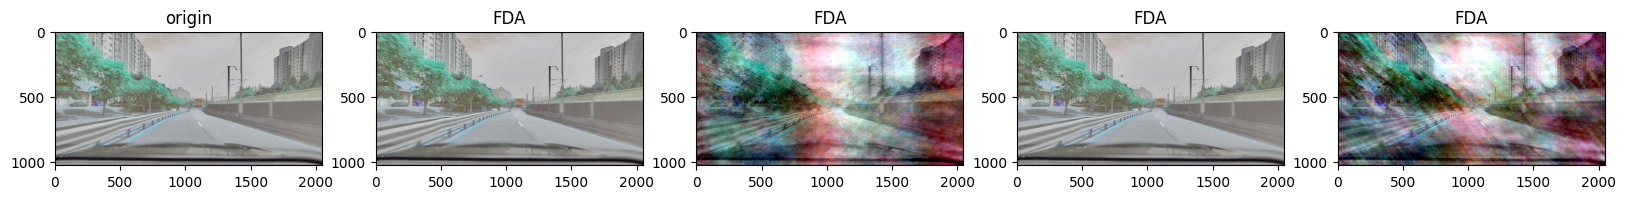

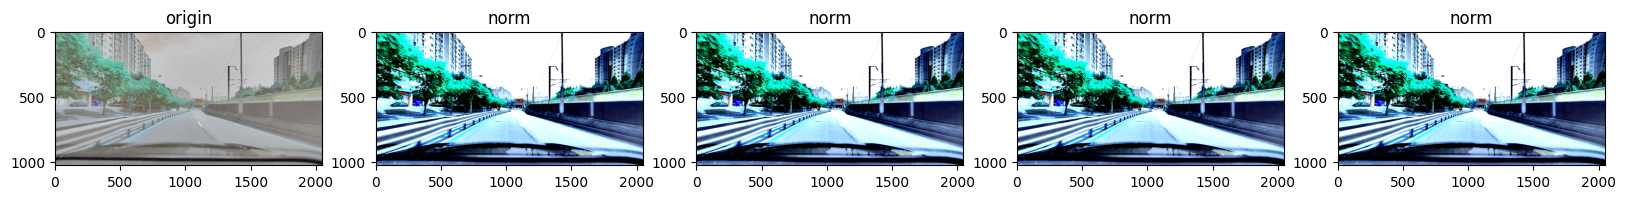

In [28]:
ref_img_path = glob("./data/train_target_image/*")


import albumentations as at

# 좌우 반전
# aug_horizontal = at.HorizontalFlip(p=0.5)
aug_FDA = at.FDA(ref_img_path[:1000], beta_limit=1, always_apply=False, p=1)
#aug_norm = at.Normalize(mean=(mean_r,mean_g,mean_b), std=(std_r, std_g, std_b), p=1)
aug_norm = at.Normalize(p=1)


image = cv2.imread('./data/train_source_image/TRAIN_SOURCE_0000.png')


aug_apply(image=norm_image, label='FDA', aug=aug_FDA)
norm_image = aug_FDA(image=image)['image']
aug_apply(image=image, label='norm', aug=aug_norm)
# aug_apply(image=image, label='Horizontal', aug=aug_horizontal)

In [41]:
%cd data/train_source_gt2fish 

/home/user/ai_test/data/train_source_gt2fish


In [66]:
from tqdm import tqdm
file = open("../splits/val.txt", "r")
gt_path = file.readlines()

cnt = 0
for path in tqdm(gt_path) :
    path = './' + path.split('\n')[0] + '.png'
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if 10 in mask :
        cnt += 1
print(cnt)

100%|██████████| 220/220 [00:01<00:00, 137.10it/s]

76


In [64]:
mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

[ WARN:0@5462.534] global loadsave.cpp:248 findDecoder imread_('./TRAIN_SOURCE_1677'): can't open/read file: check file path/integrity
